# IBM Employee Attrition and Performance Exploratory Data Analysis (EDA)

In [11]:
#loading python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [5]:
#creating a dataframe for the dataset
df = pd.read_csv('IBM.csv')

In [6]:
#initial EDA work
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

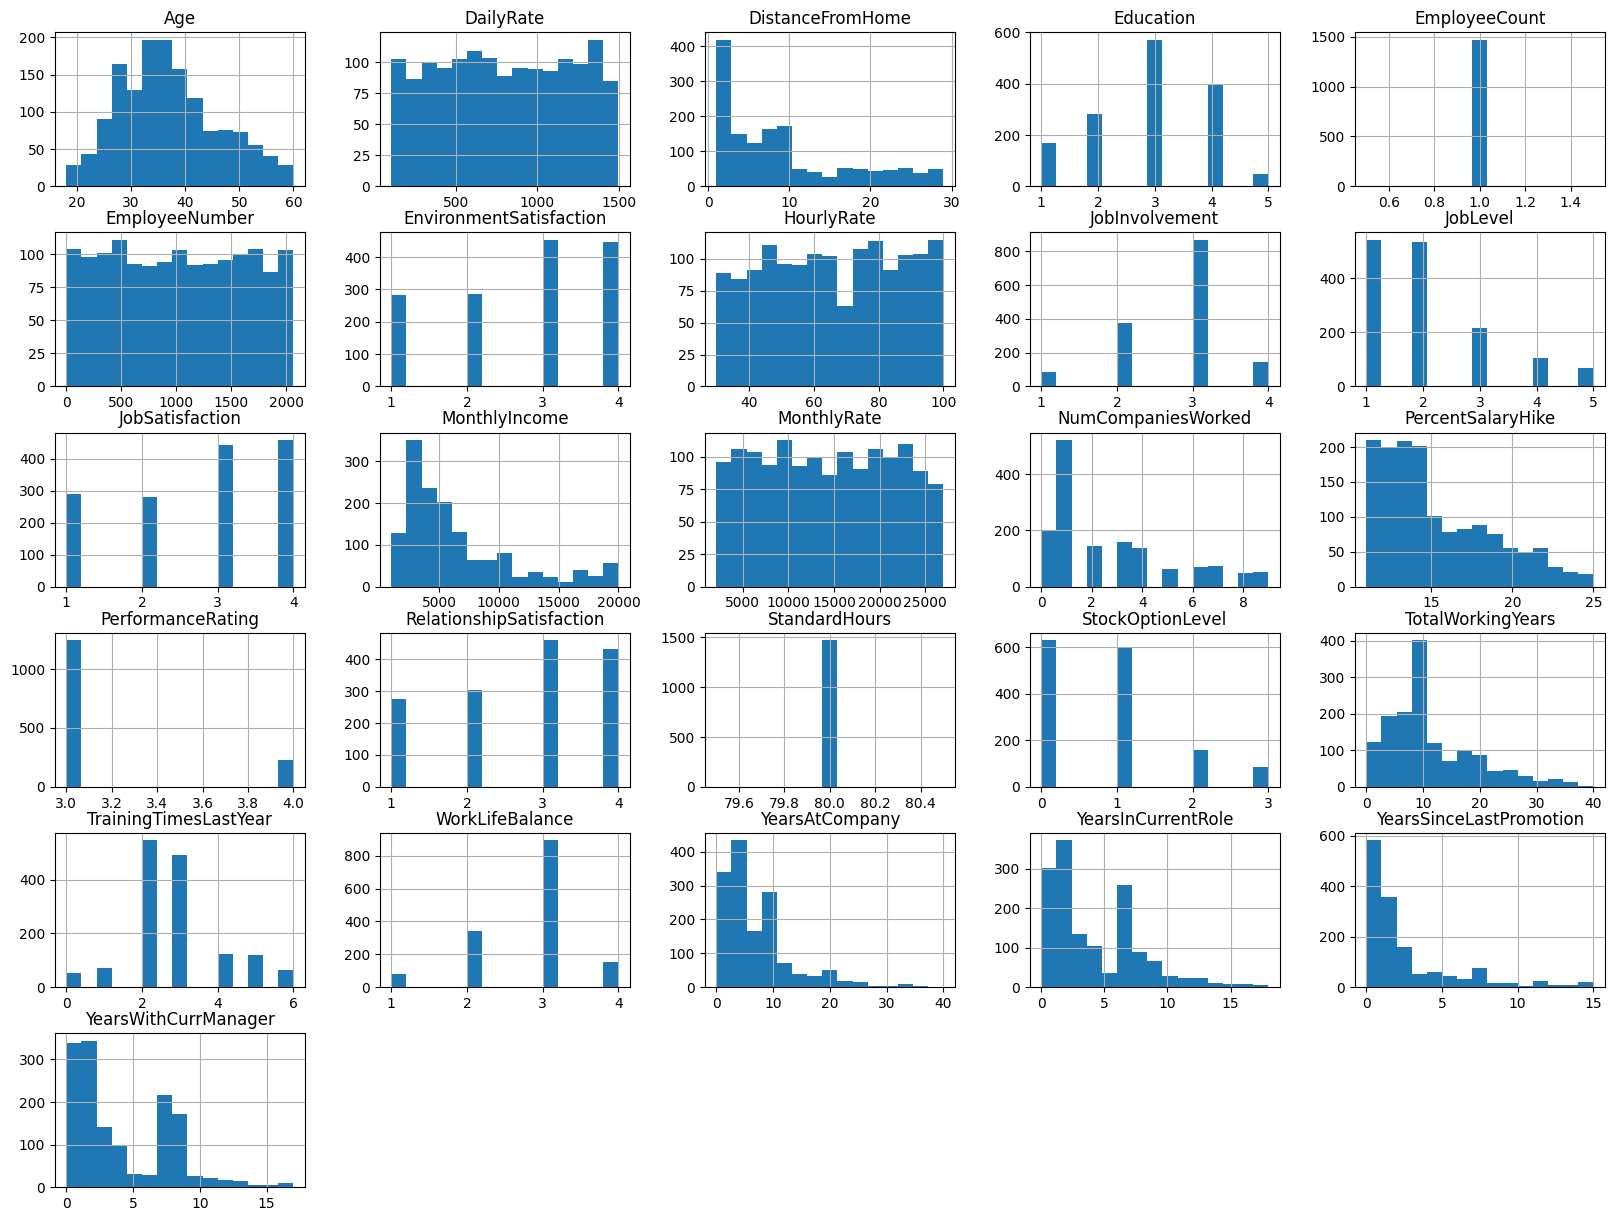

In [7]:
#printing our histograms
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols.hist(bins=15, figsize=(20, 15))
plt.show()

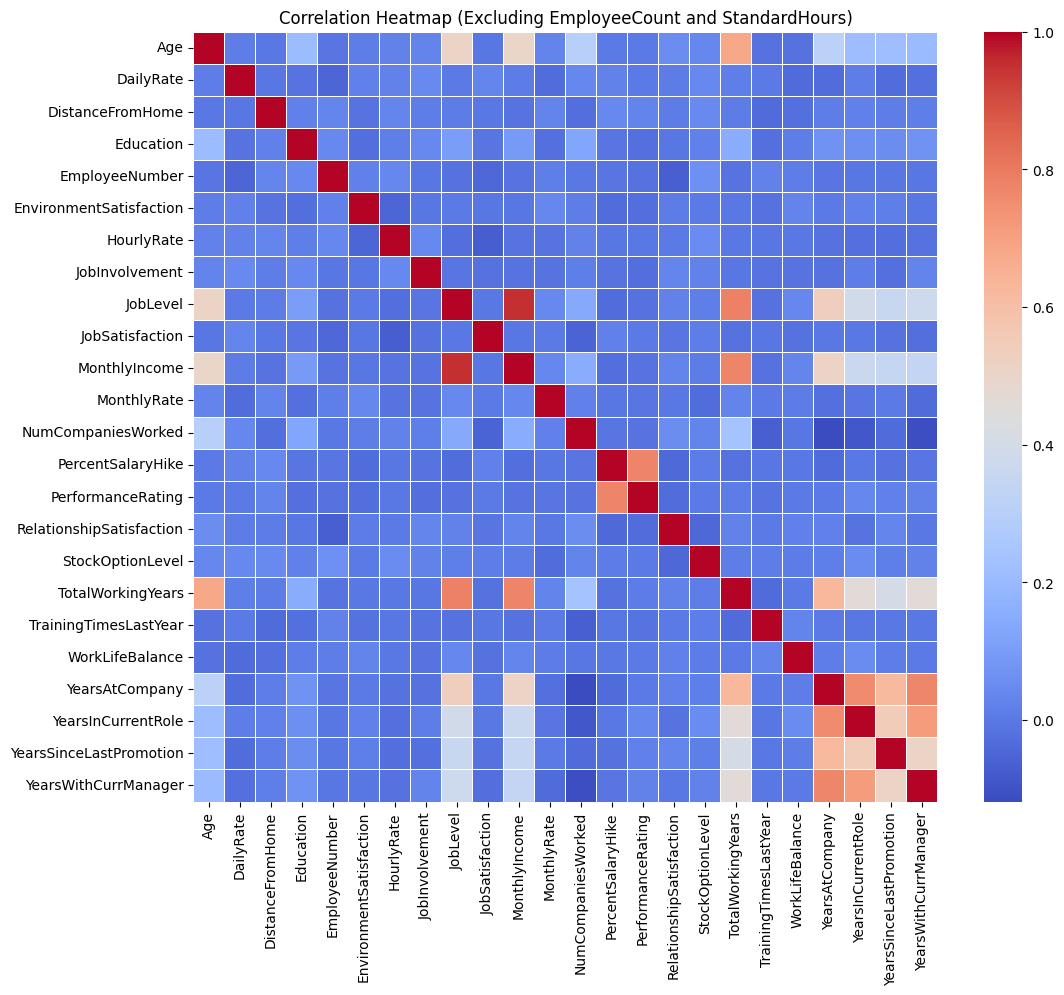

In [8]:
# Selecting numerical columns for correlation analysis (excluding EmployeeCount and StandardHours)
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols = numerical_cols.drop(['EmployeeCount', 'StandardHours'], axis=1)

# Calculating the correlation matrix
correlation_matrix = numerical_cols.corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (Excluding EmployeeCount and StandardHours)')
plt.show()

In [9]:
# Performing ANOVA to check relationship between income and departments
result = df.groupby('Department')['MonthlyIncome'].apply(list)
f_statistic, p_value = f_oneway(*result)

# Printing the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpreting the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in monthly income between departments.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in monthly income between departments.")

F-statistic: 3.2017829294201716
P-value: 0.04097409724987449
Reject the null hypothesis: There is a significant difference in monthly income between departments.


In [13]:
#testing for an association between attrition and gender features.
#creating a contingency table
contingency_table = pd.crosstab(df['Attrition'], df['Gender'])
print(contingency_table)
#Performing Chi-Square analysis
chi2, p, _, _ = chi2_contingency(contingency_table)

#Printing the results
print("Chi-Square statistics:", chi2)
print("P-value:", p)

#Interpreting the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is an association between Attrition and Gender.")
else:
    print("Fail to reject the null hypothesis: There is no association between Attrition and Gender.")

Gender     Female  Male
Attrition              
No            501   732
Yes            87   150
Chi-Square statistics: 1.1169671241970975
P-value: 0.29057244902890855
Fail to reject the null hypothesis: There is no association between Attrition and Gender.
